## Final training notebook – 50 epoch, batch size = 64, Adam optimizer, MSE-loss



In [1]:
#%% 1. Setup és adatok
import sys, os
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(".."))
from complex_mlp.model import ComplexMLP

# Adat betöltése és előkészítés
data = np.load("../data/processed/dataset_preProcessed.npz")
X = data["images"].reshape(len(data["images"]), -1) / 255.0
y = data["labels"]

# Train/validation split
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Dinamikus dimenziók
input_dim = X_tr.shape[1]
n_classes = len(np.unique(y_tr))

# Modell-konstansok
layer_sizes = [input_dim, 512, n_classes]
activations = ["tanh", "softmax"]
loss_fn      = "mse"
optimizer    = "adam"
opt_kwargs   = {"lr": 5e-4, "beta1":0.9, "beta2":0.999, "eps":1e-8}
batch_size   = 64
epochs       = 50

# One-hot a MSE-hez
y_tr_hot  = np.eye(n_classes)[y_tr]
y_val_hot = np.eye(n_classes)[y_val]


In [2]:
#%% 2. Training loop 50 epoch és időmérés
train_losses = []
epoch_times  = []

model = ComplexMLP(
    layer_sizes=layer_sizes,
    activations=activations,
    loss=loss_fn,
    optimizer=optimizer,
    optimizer_kwargs=opt_kwargs,
    early_stopping=False
)

for ep in range(1, epochs+1):
    t0 = time.time()
    # shuffle
    idx = np.random.permutation(len(X_tr))
    Xs, ys = X_tr[idx], y_tr_hot[idx]
    # train batches
    tr_loss_sum = 0.0
    for i in range(0, len(Xs), batch_size):
        xb = Xs[i:i+batch_size]
        yb = ys[i:i+batch_size]
        preds = model.forward(xb)
        loss  = model.loss_fn.forward(preds, yb)
        grad  = model.loss_fn.backward()
        model.backward(grad)
        tr_loss_sum += loss * len(xb)
    avg_tr_loss = tr_loss_sum / len(X_tr)
    t1 = time.time()
    elapsed = t1 - t0

    train_losses.append(avg_tr_loss)
    epoch_times.append(elapsed)

    print(f"Epoch {ep}/{epochs}  train_loss={avg_tr_loss:.4f}  time={elapsed:.2f}s")


Epoch 1/50  train_loss=0.0178  time=13.38s
Epoch 2/50  train_loss=0.0135  time=12.82s
Epoch 3/50  train_loss=0.0114  time=13.02s
Epoch 4/50  train_loss=0.0101  time=12.60s
Epoch 5/50  train_loss=0.0094  time=12.54s
Epoch 6/50  train_loss=0.0087  time=12.08s
Epoch 7/50  train_loss=0.0083  time=13.35s
Epoch 8/50  train_loss=0.0078  time=12.08s
Epoch 9/50  train_loss=0.0073  time=12.34s
Epoch 10/50  train_loss=0.0070  time=13.28s
Epoch 11/50  train_loss=0.0066  time=12.40s
Epoch 12/50  train_loss=0.0062  time=12.05s
Epoch 13/50  train_loss=0.0059  time=13.76s
Epoch 14/50  train_loss=0.0056  time=12.15s
Epoch 15/50  train_loss=0.0055  time=12.97s
Epoch 16/50  train_loss=0.0052  time=12.50s
Epoch 17/50  train_loss=0.0050  time=12.68s
Epoch 18/50  train_loss=0.0047  time=13.48s
Epoch 19/50  train_loss=0.0044  time=12.16s
Epoch 20/50  train_loss=0.0043  time=12.43s
Epoch 21/50  train_loss=0.0041  time=13.37s
Epoch 22/50  train_loss=0.0038  time=13.46s
Epoch 23/50  train_loss=0.0037  time=11.9

In [6]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

y_pred = model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f"→ Final validation accuracy: {acc:.4f}")

→ Final validation accuracy: 0.9632


In [3]:
#%% 3. Eredmények táblázatban
df = pd.DataFrame({
    "epoch":       np.arange(1, epochs+1),
    "train_loss":  train_losses,
    "epoch_time":  epoch_times
})
display(df)


,epoch,train_loss,epoch_time
0,1,0.017837,13.383976
1,2,0.013490,12.821388
2,3,0.011354,13.016170
3,4,0.010072,12.595949
4,5,0.009419,12.541319
5,6,0.008730,12.082415
6,7,0.008283,13.354226
7,8,0.007795,12.078658
8,9,0.007321,12.337060
9,10,0.006957,13.276047


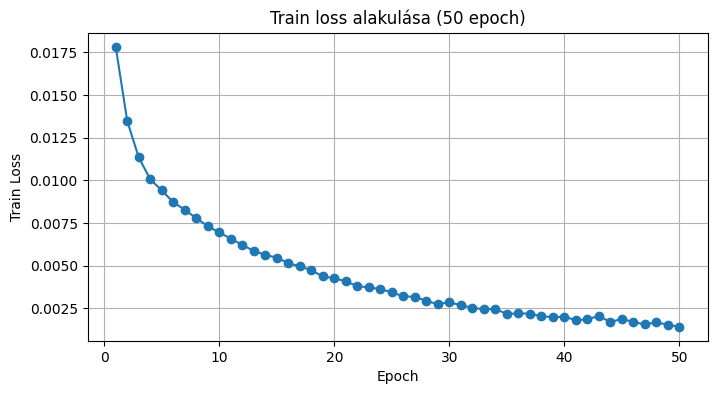

In [4]:
#%% 4. (Opcionális) train_loss csökkenés ábrázolása
plt.figure(figsize=(8,4))
plt.plot(df["epoch"], df["train_loss"], marker='o')
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Train loss alakulása (50 epoch)")
plt.grid(True)
plt.show()


In [7]:
#%% 5. Súlyok mentése
# A modell W és b súlyait menti a megadott .npz fájlba
weights_path = "../data/weights/final_model_weights.npz"
model.save(weights_path)
print(f"Súlyok elmentve ide: {weights_path}")

Súlyok elmentve: ../data/weights/final_model_weights.npz
Súlyok elmentve ide: ../data/weights/final_model_weights.npz
